In [2]:
!pip install ultralytics opencv-contrib-python segment-anything cvlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 72.1 MB/s eta 0:00:0000:010:01
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 874.1/874.1 kB 41.3 MB/s eta 0:00:00
  Created wheel for cvlib: filename=cvlib-0.2.7-py3-none-any.whl size=10046370 sha256=c9bfd0bf5e3b7974fdf2fb774d902e6fe0417abe7a7fd2bac3fea5f83c4605ed
  Stored in directory: /root/.cache/pip/wheels/9e/a5/d4/fe37b48fe4f4b621ba5e574a991230070f3cc4f02322a01489
  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25837 sha256=dec5d11c40af5c8138a9b0b810009d5b0206d6fe818b482c02fb064338c799fe
  Stored in directory: /root/.cache/pip/wheels/85/cf/3a/e265e975a1e7c7e54eb3692d6aa4e2e7d6a3945d29da46f2d7
  Created wheel for progressbar: filename=progressbar-2.5-py3-none-any.whl size=12067 sha256=894f5c3c0bd317bdfe562583402074240f69eb3bdee2220ba1187e61c3f943be
  Stored in directory: /root/.c

In [28]:
import cv2
import cvlib as cv
from cvlib.object_detection import draw_bbox

In [29]:
#allowing user to choose /uplaod(in the future) image

print("Which image: \n 1 \n 2 \n 3")
choice = int(input())
img_choice = ""

if choice == 1:
    img_choice = "/kaggle/input/avataar/Screenshot 2024-09-26 at 4.34.14PM.png"
    print("You chose the stool image")
elif choice ==  2:
    img_choice = "/kaggle/input/avataar/bagpack.jpg"
    print("You chose the bag image")
elif choice ==  3:
    img_choice = "/kaggle/input/avataar/wall hanging.jpg"
    print("You chose the wall hanging image")
else:
    print("?????")
 
        

Which image: 
 1 
 2 
 3


 2


You chose the bag image


In [30]:
coco_class_ids = {
    'person': 0,
    'bicycle': 1,
    'car': 2,
    'motorcycle': 3,
    'airplane': 4,
    'bus': 5,
    'train': 6,
    'truck': 7,
    'boat': 8,
    'traffic light': 9,
    'fire hydrant': 10,
    'stop sign': 11,
    'parking meter': 12,
    'bench': 13,
    'bird': 14,
    'cat': 15,
    'dog': 16,
    'horse': 17,
    'sheep': 18,
    'cow': 19,
    'elephant': 20,
    'bear': 21,
    'zebra': 22,
    'giraffe': 23,
    'backpack': 24,
    'umbrella': 25,
    'handbag': 26,
    'tie': 27,
    'suitcase': 28,
    'frisbee': 29,
    'skis': 30,
    'snowboard': 31,
    'sports ball': 32,
    'kite': 33,
    'baseball bat': 34,
    'baseball glove': 35,
    'skateboard': 36,
    'surfboard': 37,
    'tennis racket': 38,
    'bottle': 39,
    'wine glass': 40,
    'cup': 41,
    'fork': 42,
    'knife': 43,
    'spoon': 44,
    'bowl': 45,
    'banana': 46,
    'apple': 47,
    'sandwich': 48,
    'orange': 49,
    'broccoli': 50,
    'carrot': 51,
    'hot dog': 52,
    'pizza': 53,
    'donut': 54,
    'cake': 55,
    'chair': 56,
    'couch': 57,
    'potted plant': 58,
    'bed': 59,
    'dining table': 60,
    'toilet': 61,
    'TV': 62,
    'laptop': 63,
    'mouse': 64,
    'remote': 65,
    'keyboard': 66,
    'cell phone': 67,
    'microwave': 68,
    'oven': 69,
    'toaster': 70,
    'sink': 71,
    'refrigerator': 72,
    'book': 73,
    'clock': 74,
    'vase': 75,
    'scissors': 76,
    'teddy bear': 77,
    'hair drier': 78,
    'toothbrush': 79
}

object_synonyms = {
    # Bags
    'bag': ['handbag', 'backpack', 'suitcase', 'bag'],
    'luggage': ['suitcase', 'backpack', 'luggage'],

    # Vehicles
    'vehicle': ['car', 'truck', 'bus', 'bicycle', 'motorcycle', 'vehicle'],
    'car': ['car', 'truck', 'bus', 'car'],
    'bike': ['bicycle', 'motorcycle', 'bike'],
    'aircraft': ['airplane', 'aircraft'],
    'ship': ['boat', 'ship'],
    'train': ['train', 'train'],

    # Animals
    'animal': ['dog', 'cat', 'elephant', 'zebra', 'horse', 'bird', 'cow', 'sheep', 'bear', 'giraffe', 'animal'],
    'pet': ['dog', 'cat', 'pet'],
    'wild animal': ['elephant', 'zebra', 'bear', 'giraffe', 'horse', 'wild animal'],
    'bird': ['bird', 'bird'],
    'farm animal': ['cow', 'sheep', 'horse', 'farm animal'],

    # Specific animal
    'dog': ['dog', 'dog'],
    'cat': ['cat', 'cat'],

    # Furniture & Household Items
    'furniture': ['chair', 'couch', 'bed', 'dining table', 'bench', 'furniture'],
    'table': ['dining table', 'table'],
    'chair': ['chair', 'couch', 'chair'],
    'bed': ['bed', 'bed'],
    'seating': ['chair', 'couch', 'bench', 'seating'],

    # Electronic Devices
    'device': ['laptop', 'cell phone', 'mouse', 'keyboard', 'remote', 'device'],
    'computer': ['laptop', 'keyboard', 'mouse', 'computer'],
    'phone': ['cell phone', 'phone'],
    'tv': ['TV', 'tv'],
    'remote': ['remote', 'remote'],

    # Kitchen Items
    'kitchen item': ['bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'kitchen item'],
    'utensil': ['fork', 'knife', 'spoon', 'utensil'],
    'glass': ['wine glass', 'cup', 'glass'],
    'dish': ['bowl', 'dish'],
    'bottle': ['bottle', 'bottle'],

    # Foods
    'food': ['banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'food'],
    'fruit': ['banana', 'apple', 'orange', 'fruit'],
    'vegetable': ['broccoli', 'carrot', 'vegetable'],
    'dessert': ['donut', 'cake', 'dessert'],
    'fast food': ['hot dog', 'pizza', 'fast food'],

    # Accessories & Clothing
    'clothing': ['tie', 'suitcase', 'clothing'],
    'accessory': ['tie', 'umbrella', 'accessory'],
    'umbrella': ['umbrella', 'umbrella'],

    # Signage & Public Objects
    'sign': ['stop sign', 'traffic light', 'parking meter', 'sign'],
    'light': ['traffic light', 'light'],

    # Toys & Miscellaneous Items
    'toy': ['teddy bear', 'toy'],
    'bear': ['teddy bear', 'bear'],

    # Miscellaneous
    'clock': ['clock', 'clock'],
    'book': ['book', 'book'],
    'plant': ['potted plant', 'plant'],
    'scissors': ['scissors', 'scissors'],
    'toiletries': ['toothbrush', 'hair drier', 'toiletries'],
    
    # Direct mappings
    'laptop': ['laptop'],
    'handbag': ['handbag'],
    'backpack': ['backpack'],
    'suitcase': ['suitcase'],
    'bicycle': ['bicycle'],
    'motorcycle': ['motorcycle'],
    'airplane': ['airplane'],
    'bus': ['bus'],
    'train': ['train'],
    'truck': ['truck'],
    'boat': ['boat'],
    'traffic light': ['traffic light'],
    'fire hydrant': ['fire hydrant'],
    'stop sign': ['stop sign'],
    'parking meter': ['parking meter'],
    'bench': ['bench'],
    'bird': ['bird'],
    'cat': ['cat'],
    'dog': ['dog'],
    'horse': ['horse'],
    'sheep': ['sheep'],
    'cow': ['cow'],
    'elephant': ['elephant'],
    'bear': ['bear'],
    'zebra': ['zebra'],
    'giraffe': ['giraffe'],
    'frisbee': ['frisbee'],
    'skis': ['skis'],
    'snowboard': ['snowboard'],
    'sports ball': ['sports ball'],
    'kite': ['kite'],
    'baseball bat': ['baseball bat'],
    'baseball glove': ['baseball glove'],
    'skateboard': ['skateboard'],
    'surfboard': ['surfboard'],
    'tennis racket': ['tennis racket'],
    'bottle': ['bottle'],
    'wine glass': ['wine glass'],
    'cup': ['cup'],
    'fork': ['fork'],
    'knife': ['knife'],
    'spoon': ['spoon'],
    'bowl': ['bowl'],
    'banana': ['banana'],
    'apple': ['apple'],
    'sandwich': ['sandwich'],
    'orange': ['orange'],
    'broccoli': ['broccoli'],
    'carrot': ['carrot'],
    'hot dog': ['hot dog'],
    'pizza': ['pizza'],
    'donut': ['donut'],
    'cake': ['cake'],
    'chair': ['chair'],
    'couch': ['couch'],
    'potted plant': ['potted plant'],
    'bed': ['bed'],
    'dining table': ['dining table'],
    'toilet': ['toilet'],
    'TV': ['TV'],
    'mouse': ['mouse'],
    'remote': ['remote'],
    'keyboard': ['keyboard'],
    'cell phone': ['cell phone'],
    'microwave': ['microwave'],
    'oven': ['oven'],
    'toaster': ['toaster'],
    'sink': ['sink'],
    'refrigerator': ['refrigerator'],
    'book': ['book'],
    'clock': ['clock'],
    'vase': ['vase'],
    'scissors': ['scissors'],
    'teddy bear': ['teddy bear'],
    'hair drier': ['hair drier'],
    'toothbrush': ['toothbrush'],
}

In [31]:
def get_class_ids(user_term):
    specific_classes = object_synonyms.get(user_term.lower())
    
    if specific_classes:
        class_ids = []
        for class_name in specific_classes:
            class_id = coco_class_ids.get(class_name)
            if class_id is not None:
                class_ids.append(class_id)
        return class_ids
    else:
        class_ids = []
        print(f"No synonyms found for '{user_term}'.")
        return []



In [32]:
obj = input("What do you want to move?: ")

What do you want to move?:  bag


In [33]:
possible_classes = get_class_ids(obj)

if possible_classes:
    print(f"Class IDs for '{obj}': {possible_classes}")
else:
    print(f"'{obj}' is not found in the object synonyms.")

Class IDs for 'bag': [26, 24, 28]


In [34]:
import cv2
import numpy as np

# Load YOLO
weights = "/kaggle/input/avataar/Avataar/yolov3.weights"
config = "/kaggle/input/avataar/Avataar/yolov3.cfg"
net = cv2.dnn.readNet(weights, config)

# Read the image
img = cv2.imread(img_choice)
height, width, _ = img.shape

# Prepare the image for the network
blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
net.setInput(blob)

# Get the output layers
layer_names = net.getLayerNames()
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]
outs = net.forward(output_layers)


detected_class_ids = [] 

confidences = []
boxes = []

for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]

        if confidence > 0.3 and class_id in possible_classes: 
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)

            x = int(center_x - w / 2)
            y = int(center_y - h / 2)

            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            detected_class_ids.append(class_id) 

indices = cv2.dnn.NMSBoxes(boxes, confidences, 0.2, 0.4)

def draw_bbox(img, boxes, detected_class_ids, confidences, indices):
    indices = indices.flatten() if isinstance(indices, np.ndarray) else indices
    
    for i in indices:
        if i < len(boxes):
            box = boxes[i]
            (x, y, w, h) = box
            label = f"{obj}: {confidences[i]:.2f}" 
            cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)
            cv2.putText(img, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)
    return img

print(f"Boxes length: {len(boxes)}, Detected Class IDs length: {len(detected_class_ids)}, "
      f"Confidences length: {len(confidences)}, Indices length: {len(indices)}")

output_image = draw_bbox(img, boxes, detected_class_ids, confidences, indices)

cv2.imwrite("output.jpg", output_image)

Boxes length: 1, Detected Class IDs length: 1, Confidences length: 1, Indices length: 1


True

In [35]:
print(h)

225


In [36]:
import torch
from segment_anything import SamPredictor, sam_model_registry
import matplotlib.pyplot as plt
import numpy as np

model_type = "vit_h"
sam_checkpoint = "/kaggle/input/avataar/Avataar/sam_vit_h_4b8939.pth"
device = "cuda" if torch.cuda.is_available() else "cpu"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

predictor = SamPredictor(sam)



/opt/conda/lib/python3.10/site-packages/segment_anything/build_sam.py:105: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(f)


In [37]:
image = cv2.imread(img_choice)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

predictor.set_image(image_rgb)


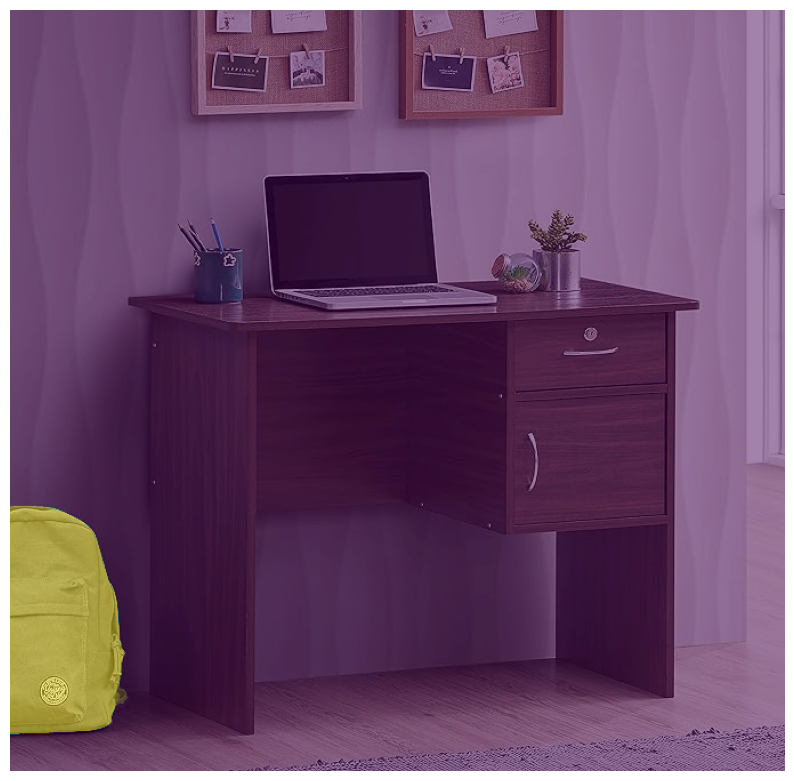

In [43]:
padding = 30
input_box = np.array([x-padding,y-padding,x+w+padding,y+h+padding])

input_box = torch.tensor(input_box).unsqueeze(0).numpy()

masks, _, _ = predictor.predict(box=input_box)

plt.figure(figsize=(10, 10))
plt.imshow(image_rgb)

for mask in masks:
    plt.imshow(mask, alpha=0.2)

plt.axis('off')
plt.show()

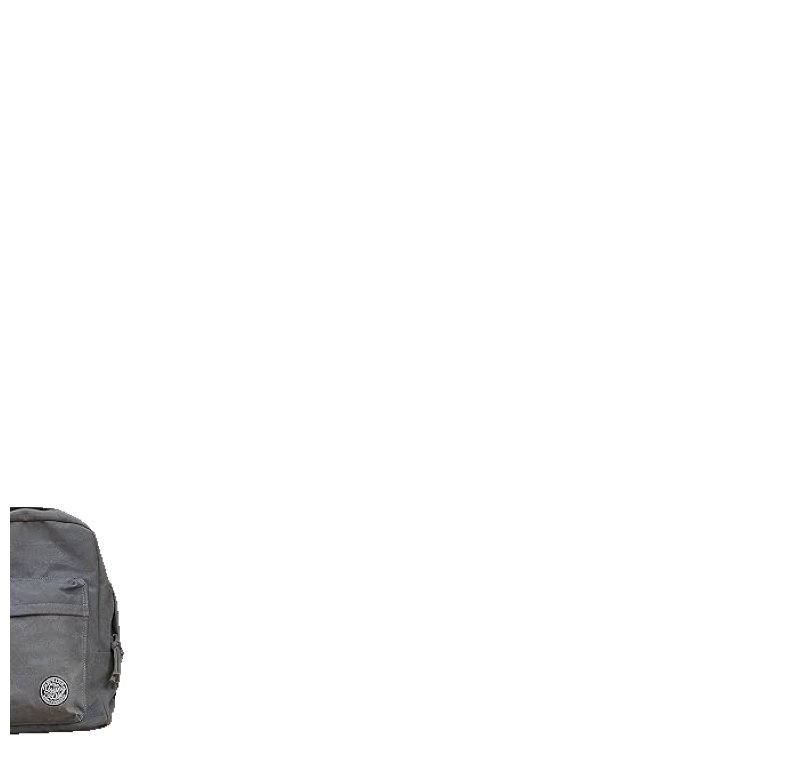

True

In [44]:
mask = masks[0]

height, width, _ = image_rgb.shape
subject_image_rgba = np.zeros((height, width, 4), dtype=np.uint8)

subject_image_rgba[..., :3] = np.where(mask[..., np.newaxis], image_rgb, 0)

subject_image_rgba[..., 3] = np.where(mask, 255, 0)

plt.figure(figsize=(10, 10))
plt.imshow(subject_image_rgba)
plt.axis('off')
plt.show()

cv2.imwrite("subject.png", cv2.cvtColor(subject_image_rgba, cv2.COLOR_RGBA2BGRA))

In [45]:
!pip install diffusers transformers accelerate
!pip install torch torchvision
!pip install opencv-python-headless

In [46]:
import torch
from diffusers import StableDiffusionInpaintPipeline
from PIL import Image
import numpy as np
import cv2

In [47]:
device = "cuda" if torch.cuda.is_available() else "cpu"
pipe = StableDiffusionInpaintPipeline.from_pretrained(
    "runwayml/stable-diffusion-inpainting",
    torch_dtype=torch.float32
).to(device)


text_encoder/model.safetensors not found


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

An error occurred while trying to fetch /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-inpainting/snapshots/8a4288a76071f7280aedbdb3253bdb9e9d5d84bb/vae: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-inpainting/snapshots/8a4288a76071f7280aedbdb3253bdb9e9d5d84bb/vae.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
An error occurred while trying to fetch /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-inpainting/snapshots/8a4288a76071f7280ae

In [48]:

def cv2_to_pil(img):
    return Image.fromarray(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

def pil_to_cv2(pil_img):
    return cv2.cvtColor(np.array(pil_img), cv2.COLOR_RGB2BGR)

(667, 679)


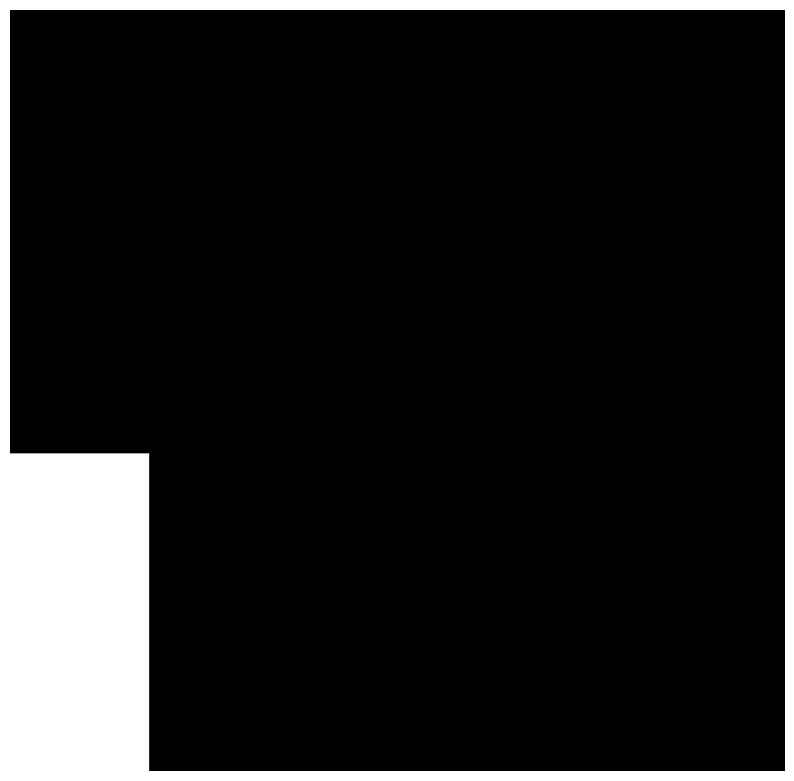

In [57]:
rect_mask = np.zeros((image_rgb.shape[0], image_rgb.shape[1]), dtype=np.uint8)
print(rect_mask.shape)
y0 = max(0,y-padding)
x0 = max(0, x-padding)
y1 = min((rect_mask.shape)[0],y+h+padding)
x1 = min((rect_mask.shape)[1],x+w+padding)
rect_mask[y0:y1, x0:x1] = 255

mask_pil = Image.fromarray(rect_mask)

plt.figure(figsize=(10, 10))
plt.imshow(mask_pil, cmap="gray")
plt.axis('off')
plt.show()


In [58]:
image_pil = Image.fromarray(image_rgb)

In [59]:

image_width = (image_pil.size)[0]
image_height = (image_pil.size)[1]
print(image_height, image_width)
aspect = image_width/image_height

667 679


  0%|          | 0/50 [00:00<?, ?it/s]

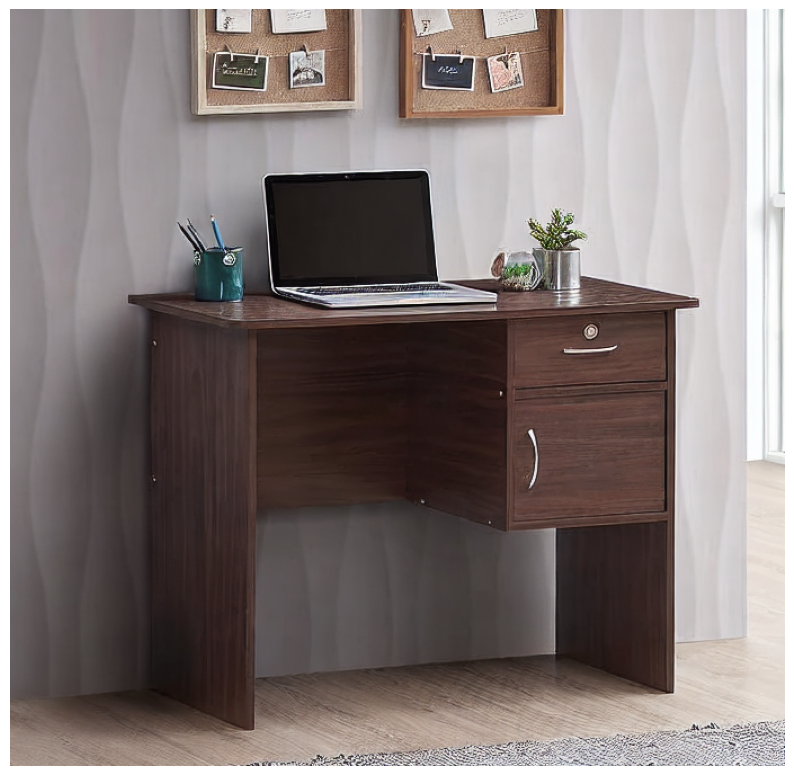

In [66]:
from matplotlib import pyplot as plt
prompt = "background"
negative_prompt = "objects, basket, person, book, lamp, vase, flower, tree, plant, photo, frame, anything, chair, sofa, couch, pen, penstand, stationary"

inpainted_image = pipe(
    prompt=prompt,
    negative_prompt=negative_prompt,
    image=image_pil,
    mask_image=mask_pil,
    num_inference_steps=50,
    guidance_scale=8,
    height = 672,
    width = 688

).images[0]

plt.figure(figsize=(10, 10))
plt.imshow(inpainted_image)
plt.axis('off')
plt.show()

inpainted_image.save("final_inpainted_image.jpg")

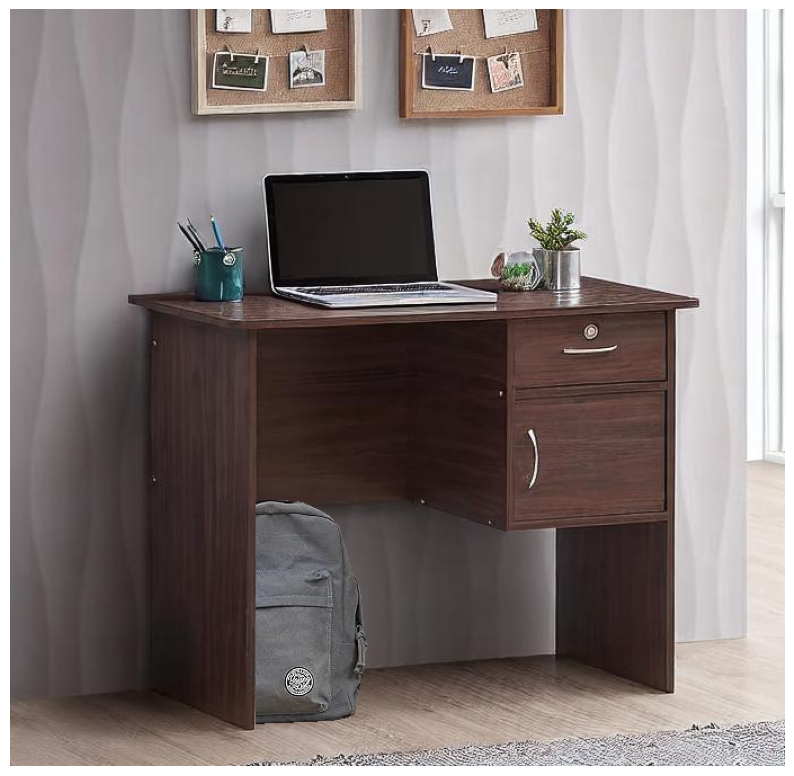

In [72]:
from PIL import Image

final_inpainted_image = Image.open("/kaggle/working/final_inpainted_image.jpg")

subject_image = Image.open("/kaggle/working/subject.png")

final_image = final_inpainted_image.copy()
final_image.paste(subject_image, (218, 0), subject_image)

plt.figure(figsize=(10, 10))
plt.imshow(final_image)
plt.axis('off')
plt.show()
final_image.save("final_image_with_subject.png")